인구 구조가 알고 싶은 지역 이름(동 단위)을 입력해주십시오.  ex.병점2동   병점2동


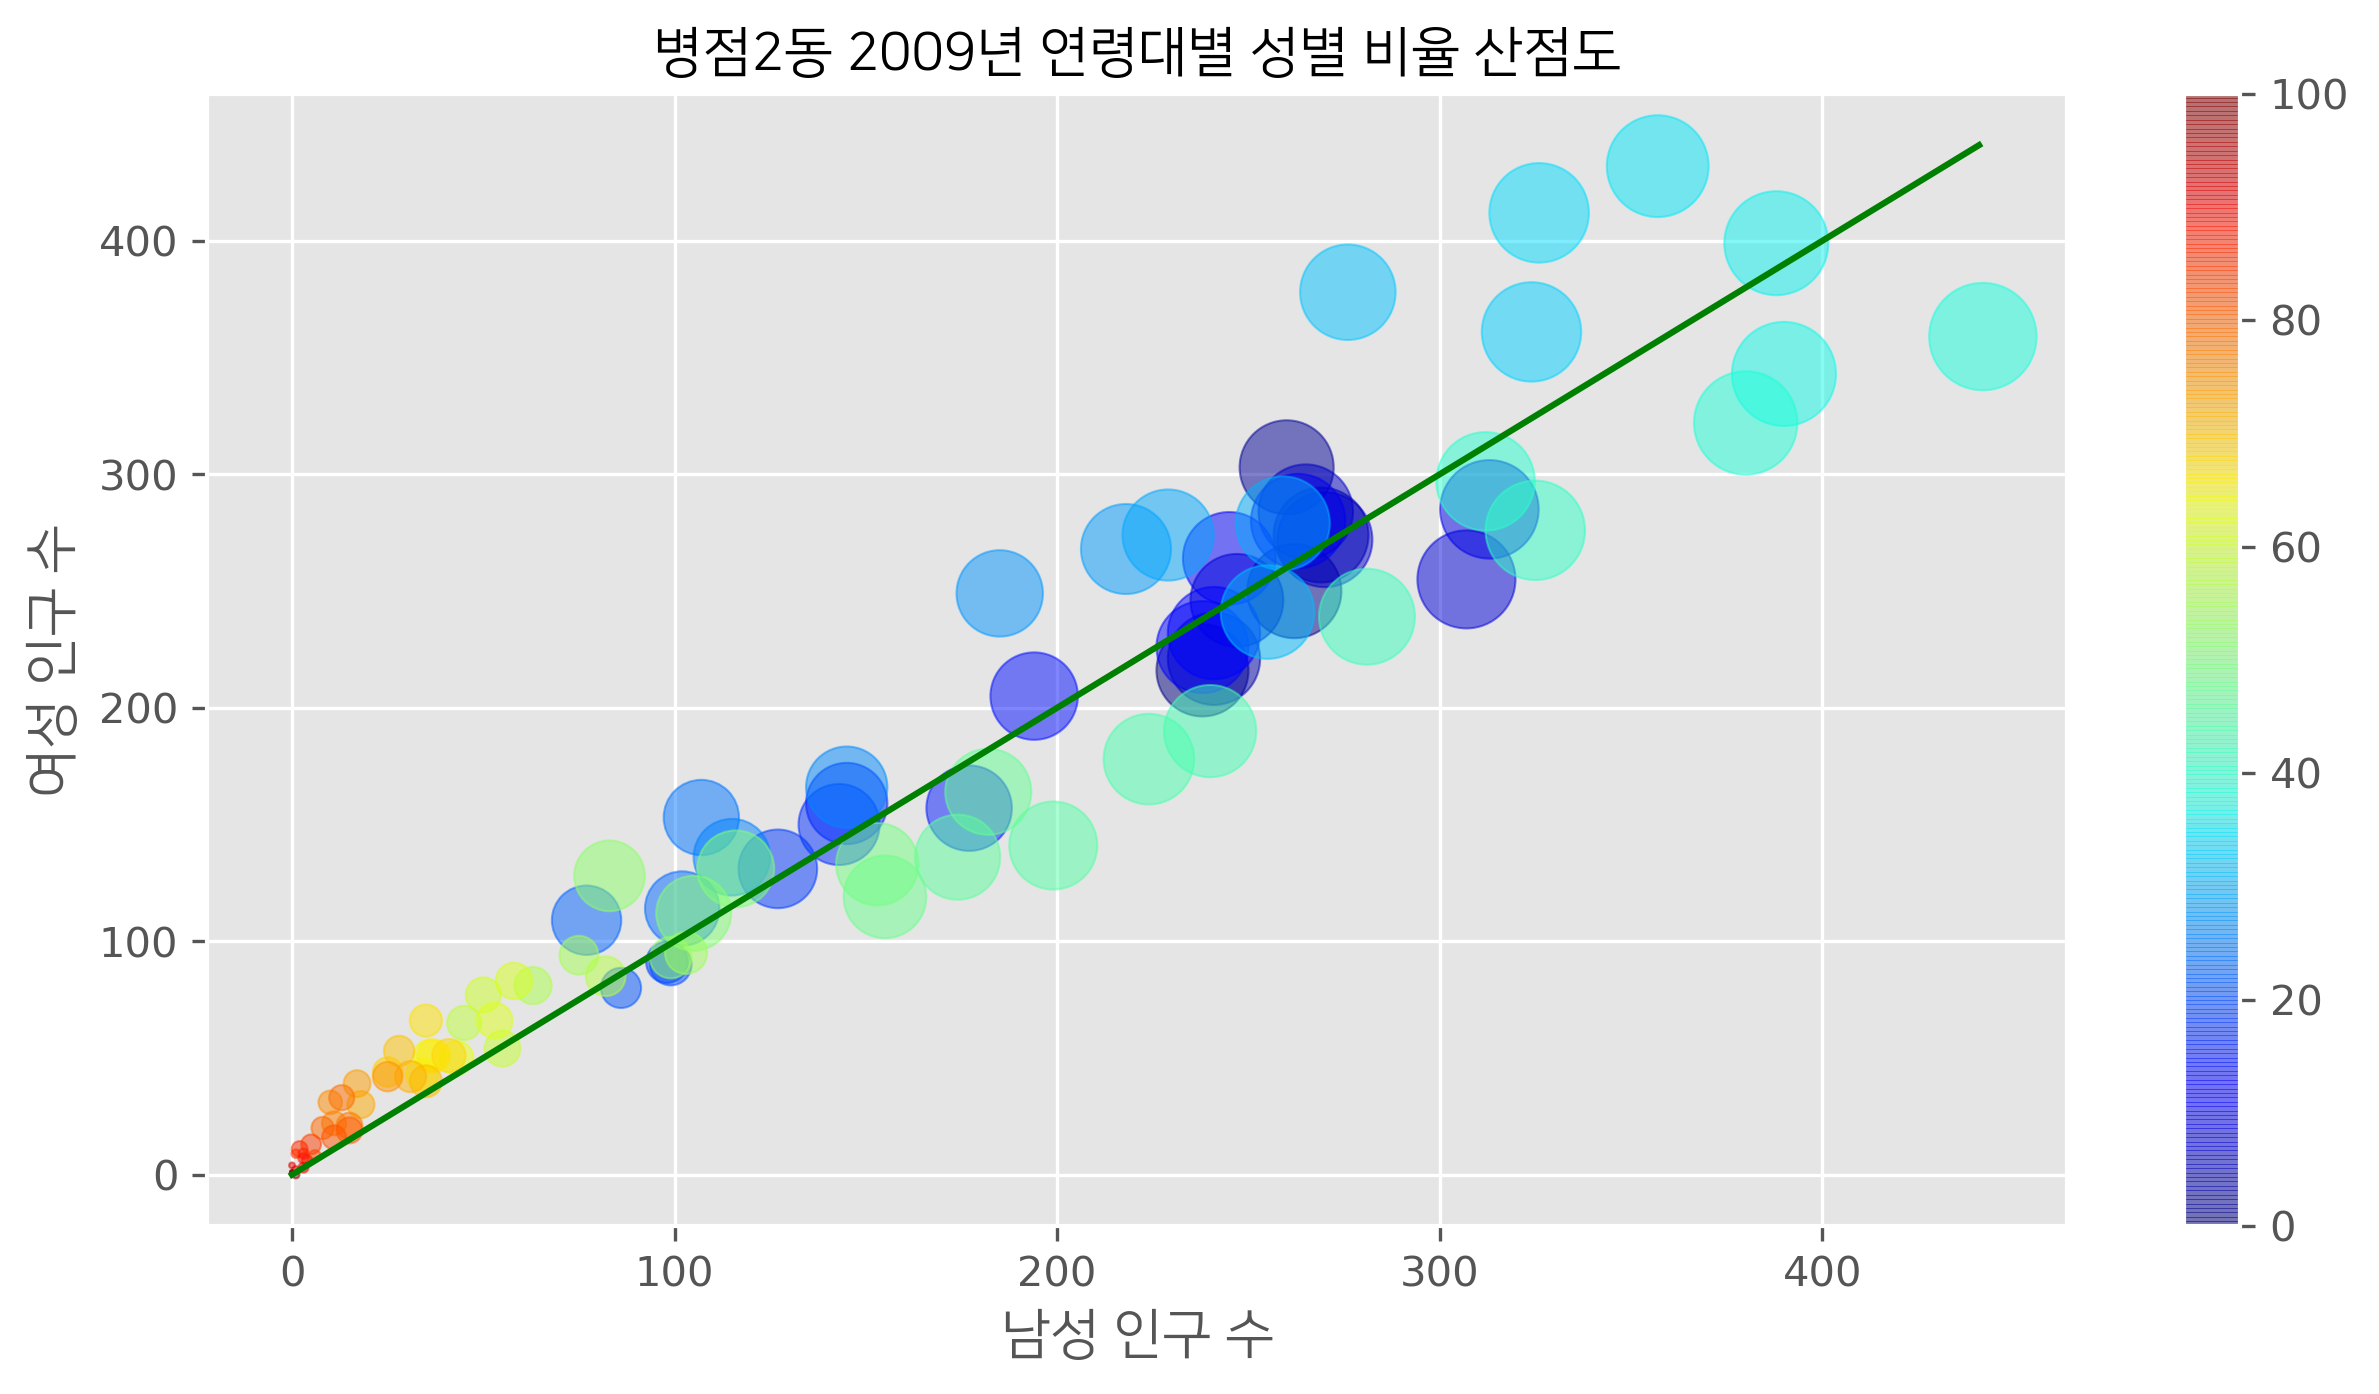

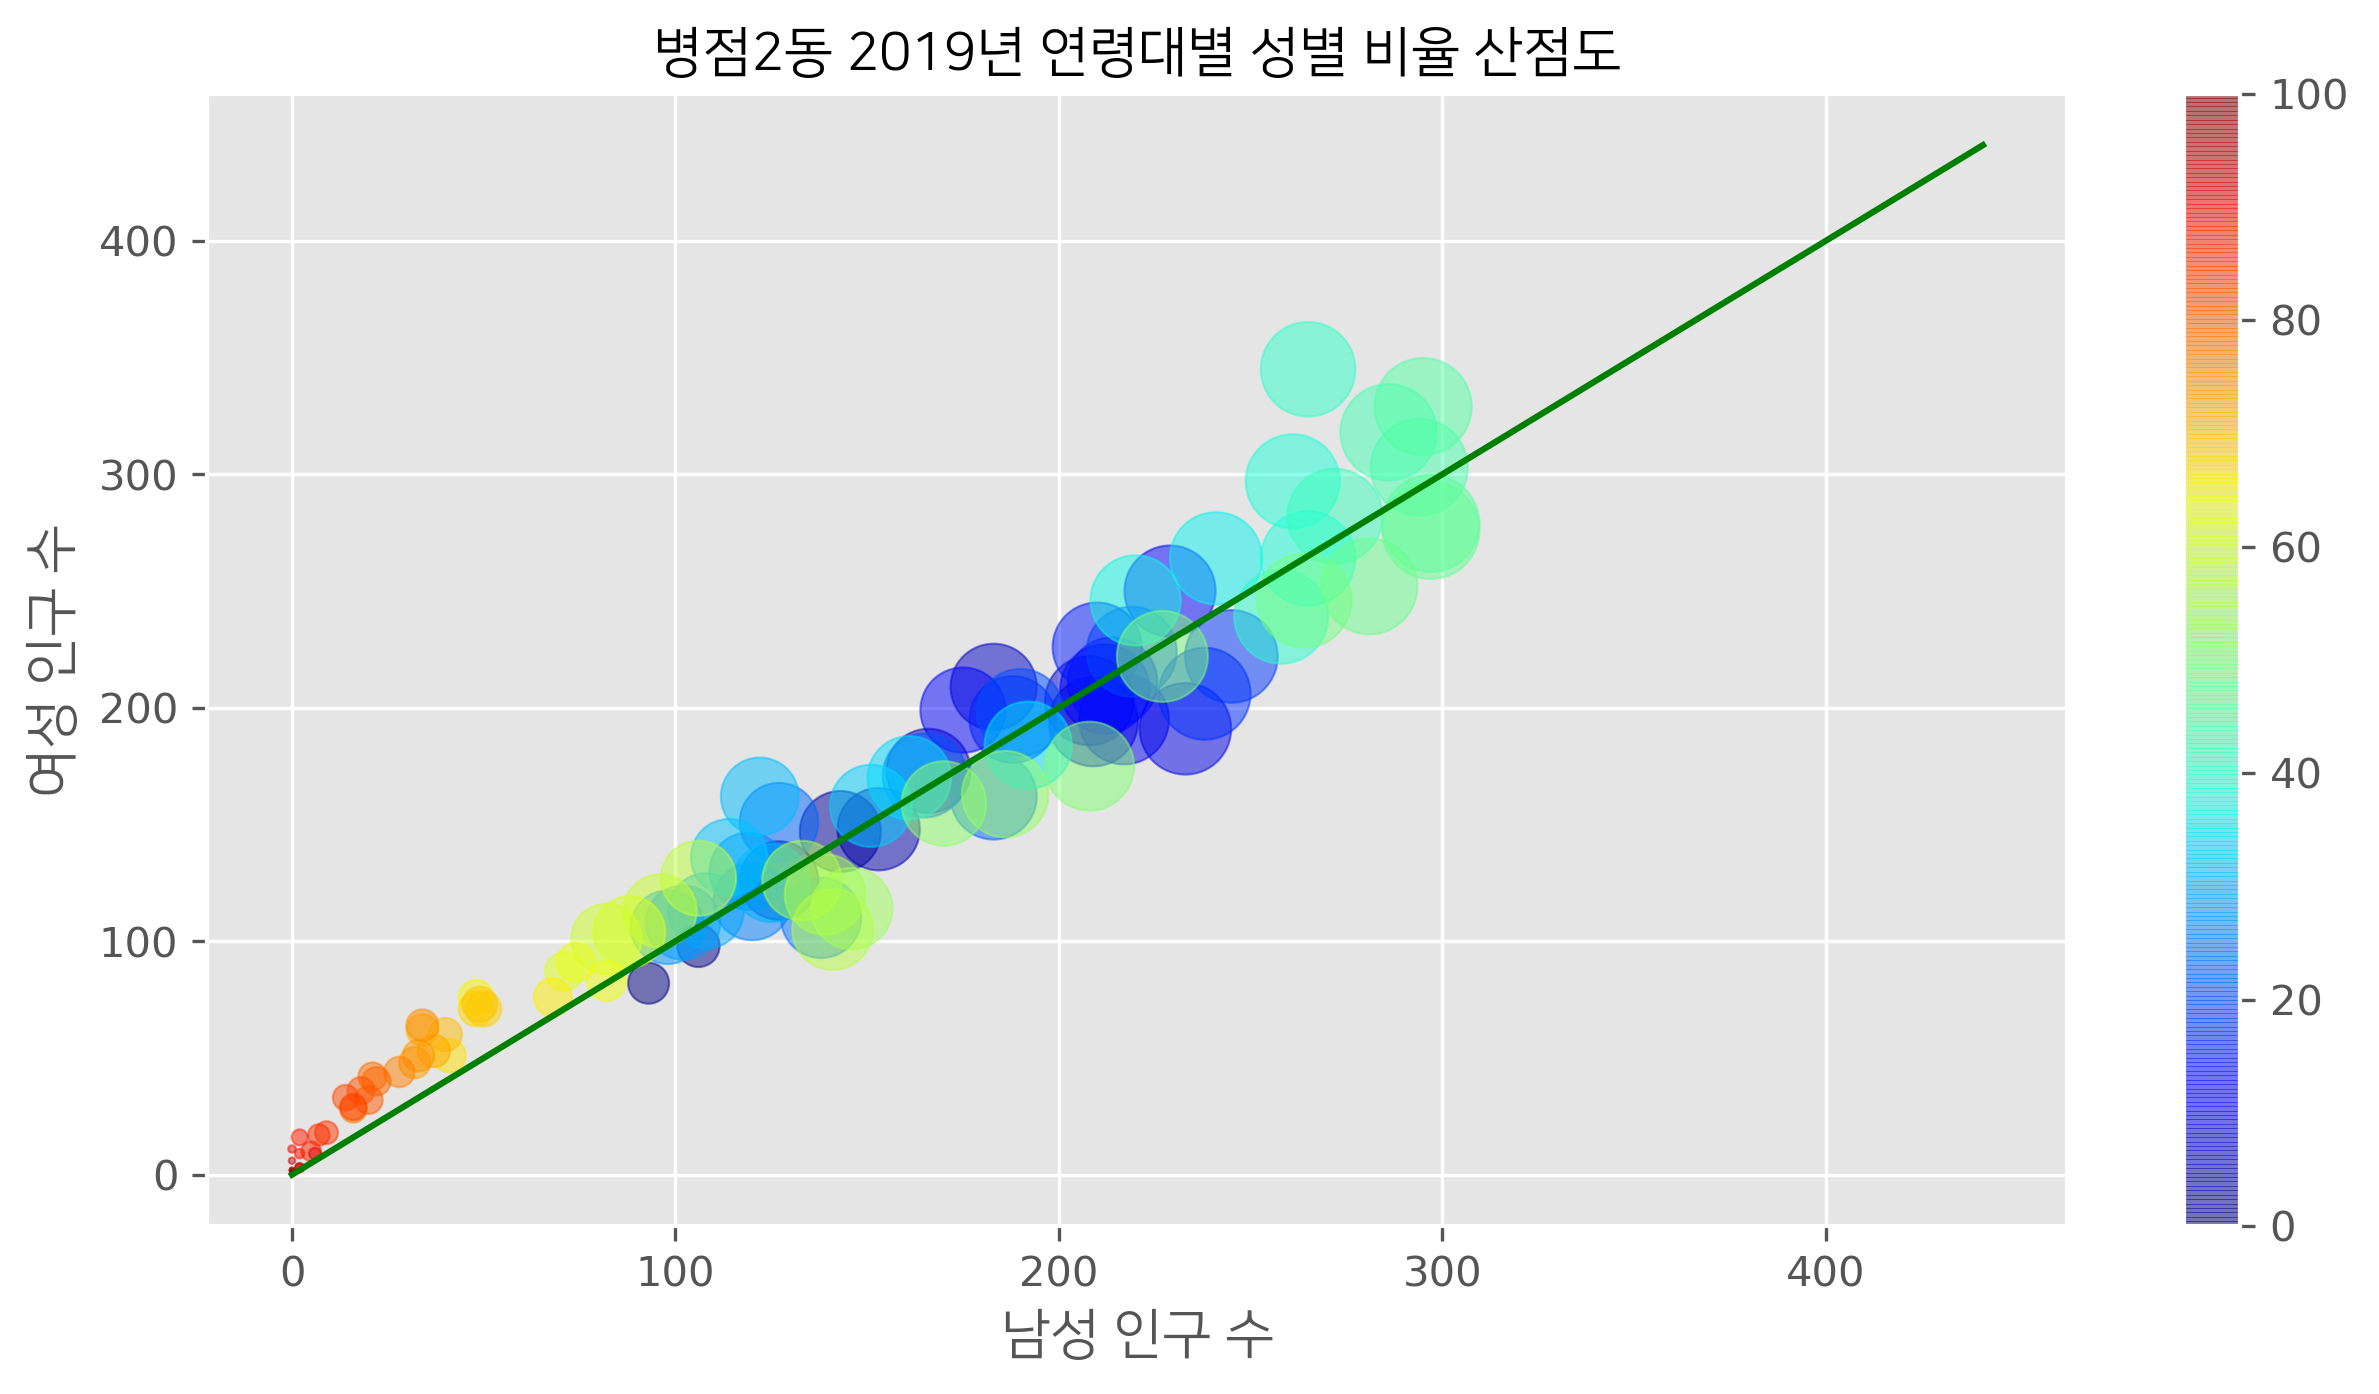

In [3]:
import csv
import math
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 1. 출생지역의 남여구분하여 다운로드한 데이터를 사용하여,
birth = input('인구 구조가 알고 싶은 지역 이름(동 단위)을 입력해주십시오.  ex.병점2동   ')
file1 = open('2009MaleFemaleYes.csv', 'r', encoding = 'cp949')   # 2009년 자료
file2 = open('2018MaleFemaleYes.csv', 'r', encoding = 'cp949')   # 2018년 자료
data1 = csv.reader(file1)
data2 = csv.reader(file2)
man1, woman1, size1 = [], [], []
man2, woman2, size2 = [], [], []

# 2. 출생지(동 단위)를 입력받아
for row in data1:
    if birth in row[0]:
        for i in range(3,104):
            man1.append(int(row[i]))       # 2009 남성 데이터 저장하기
            woman1.append(int(row[i+103]))  # 2009 여성 데이터 저장하기
            size1.append(math.sqrt(int(row[i]+row[i+103])))
        break

for row in data2:
    if birth in row[0]:
        for i in range(3,104):
            man2.append(int(row[i]))       # 2018 남성 데이터 저장하기
            woman2.append(int(row[i+103]))  # 2018 여성 데이터 저장하기
            size2.append(math.sqrt(int(row[i]+row[i+103])))
        break

# matplotlib에서 사용 가능한 한글 지원 ttf 폰트가 없어 직접 지정한다.
path = '/Applications/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/fonts/ttf/NanumSquareRegular.ttf'
fontprop = fm.FontProperties(fname=path, size=13)

# 3. 2009년과 2018년에 각각 해당하는 연령대별 성별 비율 산점도를 각각 시각화합니다.
# 산점도 표현시 추세선 그래표는 녹색으로 표현하고, 
# 버블원의 크기는 인구수의 제곱근으로 표현하며, 
# 컬러바(cmap)는 jet로 표현합니다. 

plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.title(birth +' 2009년 연령대별 성별 비율 산점도', fontproperties=fontprop)
plt.scatter(man1, woman1, s=size1, c=range(101), alpha=0.5, cmap='jet')
plt.colorbar()
plt.plot(range(max(man1)), range(max(man1)), 'g')
plt.xlabel('남성 인구 수', fontproperties=fontprop)
plt.ylabel('여성 인구 수', fontproperties=fontprop)
plt.savefig('2017110059_2009.png', dpi=300)
plt.show()

plt.style.use('ggplot')
plt.figure(figsize=(10,5), dpi=300)
plt.title(birth +' 2019년 연령대별 성별 비율 산점도', fontproperties=fontprop)
plt.scatter(man2, woman2, s=size2, c=range(101), alpha=0.5, cmap='jet')
plt.colorbar()
plt.plot(range(max(man1)), range(max(man1)), 'g')
plt.xlabel('남성 인구 수', fontproperties=fontprop)
plt.ylabel('여성 인구 수', fontproperties=fontprop)
plt.savefig('2017110059_2018.png', dpi=300)
plt.show()